


#Validation of Statement : 
##**Which perform better with linear data "Linear Regression" or "LinearSVM" or "SVM with (kernal= 'Linear')"?**

---



#Validation of Statement: 
##**Hight Bias Algorithm will have Low variance or not ?**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [0]:
X, y = make_regression(n_samples = 100, n_features=5, n_informative=4, n_targets=1 ,noise = 0.05, bias = 0.0)

In [0]:
print(X[:5,:])

[[ 1.17306954  0.19584097  0.08359589  0.15196633 -1.5392615 ]
 [-0.09258581 -0.05855686  1.42480336 -1.25885282 -0.72073904]
 [ 0.10115142  0.49388099  0.850936    1.11491562 -1.35062631]
 [ 1.83993641 -0.73902561  0.2969199  -1.07534683  0.74014533]
 [ 0.42323493 -1.06949295 -1.58902611  0.61827011  0.07416359]]


In [0]:
X.ndim

2

In [0]:
print(X.shape)

(100, 5)


In [0]:
y[:20]

array([ -43.26971599,  -78.22024224,    5.7559114 ,  103.62856426,
         -0.89220515,  -41.06007248, -275.69818648,  146.52814503,
       -171.19119579,  -32.502817  , -174.17965754,  -21.43922396,
       -113.86066984, -142.95767381,  -94.04522231,  -73.83639494,
         57.12335743, -223.66281172, -161.94730104, -154.73523149])

In [0]:
print(y.shape)

(100,)


In [0]:
Custom_dataset_data = pd.DataFrame(X, columns=('feature_1','feature_2','feature_3','feature_4','feature_5'))
Custom_dataset_target = pd.DataFrame(y)

In [0]:
Custom_dataset_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.173070,0.195841,0.083596,0.151966,-1.539261
1,-0.092586,-0.058557,1.424803,-1.258853,-0.720739
2,0.101151,0.493881,0.850936,1.114916,-1.350626
3,1.839936,-0.739026,0.296920,-1.075347,0.740145
4,0.423235,-1.069493,-1.589026,0.618270,0.074164


In [0]:
Custom_dataset_target.head()

,0
0,-43.269716
1,-78.220242
2,5.755911
3,103.628564
4,-0.892205


In [0]:
Custom_dataset_target = Custom_dataset_target.rename(columns={0 : 'Target'})

In [0]:
Custom_dataset_target.head()

,Target
0,-43.269716
1,-78.220242
2,5.755911
3,103.628564
4,-0.892205


In [0]:
Comp_Dataset = pd.concat([Custom_dataset_data,Custom_dataset_target], axis = 1)

In [0]:
Comp_Dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,Target
0,1.173070,0.195841,0.083596,0.151966,-1.539261,-43.269716
1,-0.092586,-0.058557,1.424803,-1.258853,-0.720739,-78.220242
2,0.101151,0.493881,0.850936,1.114916,-1.350626,5.755911
3,1.839936,-0.739026,0.296920,-1.075347,0.740145,103.628564
4,0.423235,-1.069493,-1.589026,0.618270,0.074164,-0.892205


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(Custom_dataset_data,Custom_dataset_target, test_size = 0.3,random_state = 115)


In [0]:
%time
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
Prediction  = LR.predict(X_test)
Score = LR.score(X_test,y_test)
R_2  = r2_score(y_test,Prediction)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [0]:
print('Score : %f R_2 score : %f' %(Score,R_2))

Score : 0.999999 R_2 score : 0.999999


In [0]:
print(Score)

0.9999993646451323


In [0]:
print(R_2)

0.9999993646451323


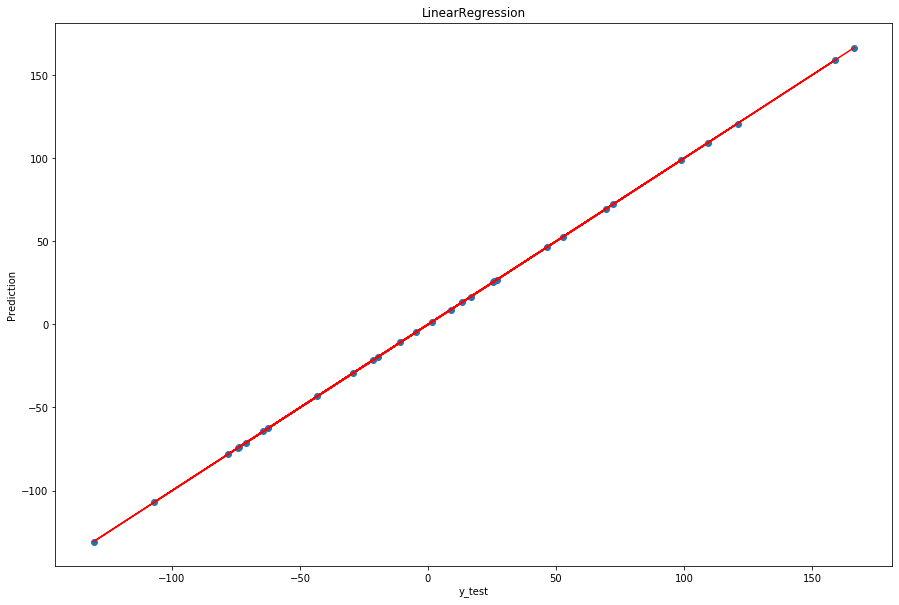

In [0]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_test,Prediction, alpha =1.0)
plt.plot(y_test,Prediction,'r')
plt.title('LinearRegression')
plt.xlabel('y_test')
plt.ylabel('Prediction')
plt.show()

In [0]:
%time
from sklearn.svm import LinearSVR
LSVR = LinearSVR()
LSVR.fit(X_train,y_train)
Prediction_LSVR = LSVR.predict(X_test)
Score_LSVR = LSVR.score(X_test,y_test)
R_2_LVSR  = r2_score(y_test,Prediction_LSVR)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print('Score : %d R_2 score : %d' %(Score_LSVR,R_2_LVSR))

Score : 0 R_2 score : 0


In [0]:
print(Score_LSVR)

0.6688158819395347


In [0]:
print(R_2_LVSR)

0.6688158819395347


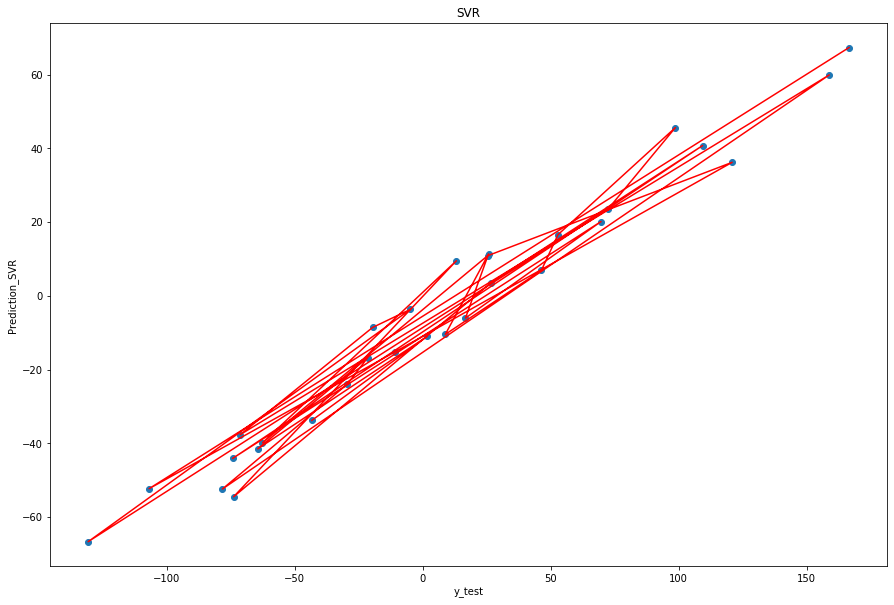

In [0]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_test,Prediction_LSVR)
plt.plot(y_test,Prediction_LSVR,'r')
plt.xlabel('y_test')
plt.ylabel('Prediction_SVR')
plt.title('SVR')
plt.show()

In [0]:
%time
from sklearn.svm import SVR
SVReg = SVR(kernel='linear')
SVReg.fit(X_train, y_train)
Prediction_SVR = SVReg.predict(X_test)
Score_SVR = SVReg.score(X_test, y_test) 
R_2_SVR  = r2_score(y_test,Prediction_SVR)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(Score_SVR)

0.5759940024539608


In [0]:
print(R_2_SVR)

0.5759940024539608


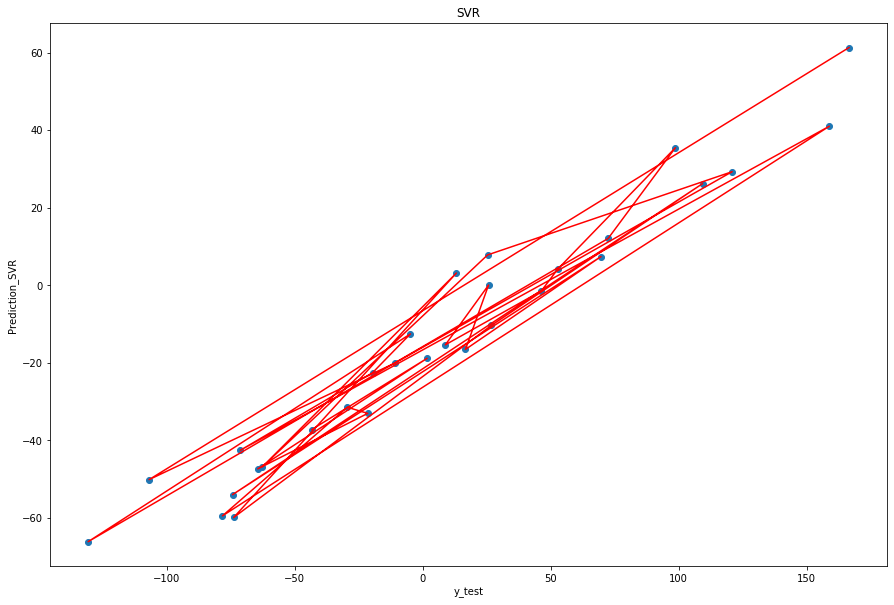

In [0]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_test,Prediction_SVR)
plt.plot(y_test,Prediction_SVR,'r')
plt.xlabel('y_test')
plt.ylabel('Prediction_SVR')
plt.title('SVR')
plt.show()

### Comparison of the Scores and R2scores for each of the Algorithm 

---


####        Score, R_2 - for Linear Regression:  
####        Score = 0.9999995870779432
####        R_2 = 0.9999995870779433

---


####        Score_SVR, R_2_SVR -  SVR with linear kernal  
####        Score = 0.8951939696534374
####        R_2 = 0.9999995870779433     

---


####        Score_LSVR, R_2_LSVR - for LinearSVR
####        Score = 0.8941065450154971
####        R_2 = 0.9999995870779433 



---



---



# **Final Outcome:**
## From this we can conclude that, **Linear Regression** perform better than LinearSVR and SVR with Linear kernal on linear data based on there performances score that we got.

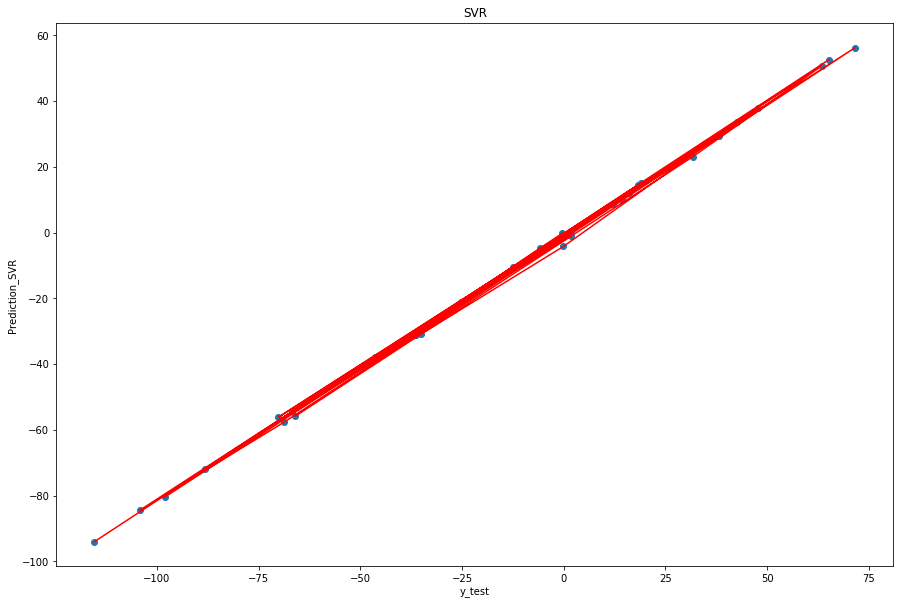

In [0]:
fig = plt.figure(figsize=(15,10))
plt.scatter(y_test,Prediction_SVR)
plt.plot(y_test,Prediction_SVR,'r')
plt.xlabel('y_test')
plt.ylabel('Prediction_SVR')
plt.title('SVR')
plt.show()

###  As it is clear from the plot's, Linear Regression plot is a smooth, straight line plot and smooth fitting, their is hardly any variance.

### On the otherhand, SVR is bit scattered which has high variance of data which is clearly seen from the plot.

### Linear Regression is a high bias algorithm which is showing very low variance. And on the otherhand, SVR is the low bias algorithm with respect to Linear Regression which is showing high variance.

##With this we conclude that : **High Bias Algorithm are having low variances.**







